In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Display the first few rows of the dataset
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
#Visualizing the dataset using PCA for 2D view

In [5]:
# Select relevant features for clustering (e.g., Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

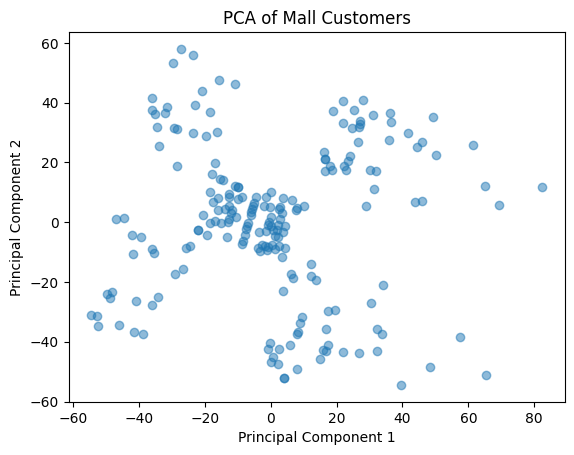

In [7]:
# Plot the PCA result
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of Mall Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [9]:
# Fit K-Means with a chosen number of clusters (e.g., K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [10]:
# Assign cluster labels to the original data
data['Cluster'] = kmeans.labels_

In [11]:
# Calculate the sum of squared distances (inertia) for different values of K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

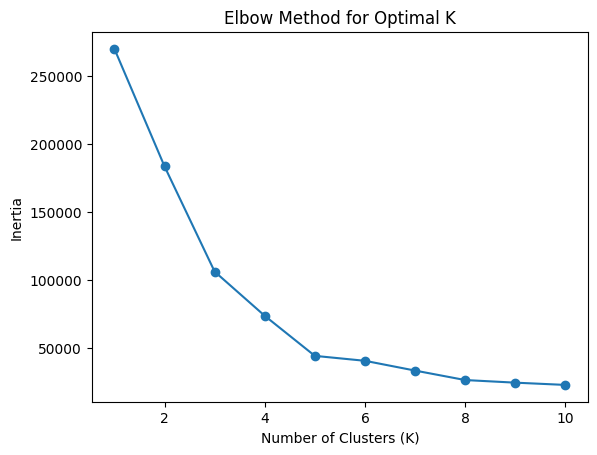

In [12]:
# Plot the Elbow Method graph
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

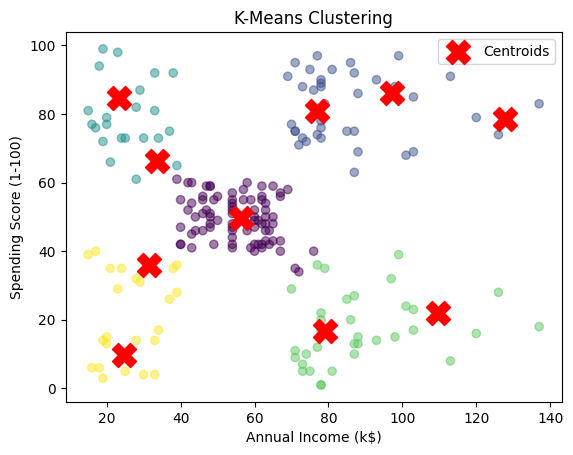

In [13]:
# Visualize the clusters with color-coding
plt.scatter(X[:, 0], X[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, data['Cluster'])
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.553931997444648
